In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append(r'C:\Users\Administrator\Datas\程序冗余\Python_files\pandas_')
from defname import  * 


# 算上节日

In [2]:
df1 = pd.read_csv(r'data/九月订单.csv',encoding='gbk')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df2 = pd.read_csv(r'data/九月门店月.csv',encoding='gbk')

In [4]:
def order(df1,df2):
    GMV = df1['商品实付销售额'].sum()
    count = df1[df1['订单状态'] == '订单完成']['订单状态'].count()
    ARPU = GMV/count
    print('GMV：',GMV)
    print('count:',count)
    print('ARPU：',ARPU)
    df_store_count = df2['商家ID'].count()
    df2_youxiao = df2[df2['有效订单数'] > 0]['商家ID'].count()
    print('门店总数',df_store_count)
    print('门店均订单',count/df_store_count)
    print('门店均营收',GMV/df_store_count)
    print('门店动销数量',df2_youxiao)
    print('门店动销率',df2_youxiao/df_store_count)
def order_clean(df,value,cloumns):
    df[cloumns] = pd.to_datetime(df[cloumns],format='%Y-%m-%d') 
    df[cloumns] = df[cloumns].dt.day
    df = df[(df[cloumns] !=value[0] ) & (df[cloumns] !=value[1] ) ]
    return df
def store_clean(df,cloumns,value,cloumns_l,x):
    df = df[(df[cloumns] !=value[0] ) & (df[cloumns] !=value[1] ) ]
    df = groupdata(data=df,columns_l=cloumns_l,x=x)
    return df
def jiedantime(data,x,y):
    data_time1 =data[(data['接单时间'] >=x)  &(data['接单时间'] < y) ]
    a = data_time1[data_time1['订单状态'] != '订单取消']['订单编号'].count()
    b = data_time1[data_time1['订单状态'] == '订单取消']['订单编号'].count()
    print('订单取消占比',b/a)
    print(a)
    print(b)

In [5]:
order(df1,df2)

GMV： 3926048.3699999996
count: 30418
ARPU： 129.06990499046617
门店总数 2159
门店均订单 14.088930060213062
门店均营收 1818.4568642890226
门店动销数量 1858
门店动销率 0.8605836035201482


# 不算节日

In [6]:
df1_null = order_clean(df1,[9,10],cloumns='下单时间')

In [7]:
df3  = pd.read_csv('data/九月门店日.csv',encoding='gbk')
add = ['曝光人数', '入店人数', '下单人数', '下单新客人数', '推单数', '有效订单数', '原价交易额', '实付交易额', '商家补贴金额','商家原因取消订单数', 'IM1分钟回复数', '差评订单数', '投诉订单数', 'IM会话数', 'IM回复数','商家拒单数', '商家超时未接单数', '商家取消不告知用户订单数', '缺货导致退款订单数', '商家少送错送导致用户退款订单数', '商家质量问题导致用户退款订单数', '配送原因取消订单数', '拣货超时订单数', '使用间或完成按钮订单数']           
mean = ['（日均）预设营业时长（h）','（日均）在线营业时长（h）', '平均商家评分', '平均商品评分', '平均配送评分','平均配送时长（min）']
count = ['开始日期', '结束日期', '商家ID', '商家名称', '运营组', '省份', '城市', '是否新增商家', '首次上线日期', '门店在线状态']
colmuns = [count,add,mean]

In [8]:
df2_null = store_clean(df=df3,cloumns='结束日期',value=[20200909,20200910],cloumns_l=colmuns,x='商家ID')

In [9]:
order(df1_null,df2_null)

GMV： 2374390.44
count: 18491
ARPU： 128.40789789627385
门店总数 2159
门店均订单 8.564613246873552
门店均营收 1099.7639833256137
门店动销数量 1660
门店动销率 0.7688744789254285


In [10]:
df2_null[df2_null['有效订单数'] > 30]['商家ID'].count()

126

In [11]:
df2_null[df2_null['有效订单数'] > 15]['商家ID'].count()

320

In [12]:
df2_null[df2_null['有效订单数'] > 10]['商家ID'].count()

491

In [30]:
df1

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）
0,\t20200901-20200930,2270350038720801,8,33秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,1167.0,414.0,0.0,753.0,教师节-鲜花预定\t,致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】,NaN,821\t,3,1167.0,414.0,753.0,753.0,0.0,否,0,0.0,0.0,0.0,是,购买致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】原价389.0元现价139.0元/购买致...,否,未回复,NaN,0.00分,0.0,2020-09-08 23:22:43\t,NaN
1,\t20200901-20200930,2270351346841638,9,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,师恩如山【11枝红康乃馨+满天星教师节鲜花花束】,NaN,965\t,1,249.0,82.5,166.5,162.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29\t,NaN
2,\t20200901-20200930,2270351346841638,9,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,德高望重【11枝粉康乃馨+满天星教师节鲜花花束】,NaN,938\t,1,268.0,82.5,185.5,181.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29\t,NaN
3,\t20200901-20200930,2270350113277705,10,18秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,399.0,126.0,0.0,273.0,19枝-玫瑰\t,钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】,NaN,016\t,1,399.0,126.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】原价399.0元现价129.0元/门店新客...,否,未回复,NaN,0.00分,0.0,2020-09-10 13:38:36\t,NaN
4,\t20200901-20200930,2270351255749570,13,95秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,219.0,85.0,0.0,134.0,11枝-玫瑰\t,一笑千金【9枝粉玫瑰满天星鲜花花束】,NaN,136\t,1,219.0,85.0,134.0,134.0,0.0,否,0,0.0,0.0,0.0,是,购买一笑千金【9枝粉玫瑰满天星鲜花花束】原价219.0元现价88.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-14 00:27:55\t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,\t20200901-20200930,100588313587728339,29,77秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,68.0,33.9,0.0,34.1,家居鲜花\t,【日常家居鲜花】3枝香槟玫瑰（无包装，同价位商品可备注更换）,NaN,361\t,1,58.0,26.9,31.1,31.1,0.0,否,0,0.0,0.0,10.0,是,购买【日常家居鲜花】3枝香槟玫瑰（不带包装）原价58.0元现价29.9元/门店新客立减3.0...,否,已回复,NaN,0.00分,0.0,2020-09-29 15:42:19\t,NaN
33740,\t20200901-20200930,100588313118279887,29,43秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-29 15:22:50\t,NaN
33741,\t20200901-20200930,100588313981997524,30,27秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-30 13:38:52\t,NaN
33742,\t20200901-20200930,100665062519384436,27,41秒,流星花园（生日花，表白花，鲜花）\t,10066506,衢州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-27 21:35:42\t,NaN


In [7]:
df1 = pd.read_csv(r'data/九月订单.csv',encoding='gbk')
data = df1
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d') 
data['下单时间——'] = data['下单时间'].dt.day
data['订单完成时间'] = pd.to_datetime(data['订单完成时间'],format='%Y-%m-%d')
data['订单使用时间1'] = (data['订单完成时间'] - data['下单时间']).dt.seconds/3600

In [8]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间——,订单使用时间1
0,\t20200901-20200930,2270350038720801,2020-09-08 14:13:49,33秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,1167.0,414.0,0.0,753.0,教师节-鲜花预定\t,致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】,NaN,821\t,3,1167.0,414.0,753.0,753.0,0.0,否,0,0.0,0.0,0.0,是,购买致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】原价389.0元现价139.0元/购买致...,否,未回复,NaN,0.00分,0.0,2020-09-08 23:22:43,NaN,8,9.148333
1,\t20200901-20200930,2270351346841638,2020-09-09 10:57:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,师恩如山【11枝红康乃馨+满天星教师节鲜花花束】,NaN,965\t,1,249.0,82.5,166.5,162.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29,NaN,9,5.389444
2,\t20200901-20200930,2270351346841638,2020-09-09 10:57:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,德高望重【11枝粉康乃馨+满天星教师节鲜花花束】,NaN,938\t,1,268.0,82.5,185.5,181.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29,NaN,9,5.389444
3,\t20200901-20200930,2270350113277705,2020-09-10 12:41:15,18秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,399.0,126.0,0.0,273.0,19枝-玫瑰\t,钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】,NaN,016\t,1,399.0,126.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】原价399.0元现价129.0元/门店新客...,否,未回复,NaN,0.00分,0.0,2020-09-10 13:38:36,NaN,10,0.955833
4,\t20200901-20200930,2270351255749570,2020-09-13 15:26:15,95秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,219.0,85.0,0.0,134.0,11枝-玫瑰\t,一笑千金【9枝粉玫瑰满天星鲜花花束】,NaN,136\t,1,219.0,85.0,134.0,134.0,0.0,否,0,0.0,0.0,0.0,是,购买一笑千金【9枝粉玫瑰满天星鲜花花束】原价219.0元现价88.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-14 00:27:55,NaN,13,9.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,\t20200901-20200930,100588313587728339,2020-09-29 13:06:31,77秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,68.0,33.9,0.0,34.1,家居鲜花\t,【日常家居鲜花】3枝香槟玫瑰（无包装，同价位商品可备注更换）,NaN,361\t,1,58.0,26.9,31.1,31.1,0.0,否,0,0.0,0.0,10.0,是,购买【日常家居鲜花】3枝香槟玫瑰（不带包装）原价58.0元现价29.9元/门店新客立减3.0...,否,已回复,NaN,0.00分,0.0,2020-09-29 15:42:19,NaN,29,2.596667
33740,\t20200901-20200930,100588313118279887,2020-09-29 14:03:02,43秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-29 15:22:50,NaN,29,1.330000
33741,\t20200901-20200930,100588313981997524,2020-09-30 12:28:16,27秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-30 13:38:52,NaN,30,1.176667
33742,\t20200901-20200930,100665062519384436,2020-09-27 14:30:13,41秒,流星花园（生日花，表白花，鲜花）\t,10066506,衢州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-27 21:35:42,NaN,27,7.091389


In [9]:
data['订单使用时间1'].describe()

count    30429.000000
mean         6.569422
std          4.643267
min          0.010000
25%          4.535833
50%          5.622222
75%          7.265833
max         23.992500
Name: 订单使用时间1, dtype: float64

In [10]:
data[data['订单使用时间1'] < 10]['订单编号'].count() / data['订单编号'].count()

0.7732930298719772

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from c

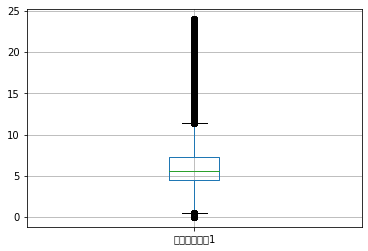

In [11]:
a = data.boxplot('订单使用时间1')

In [12]:
test=pd.DataFrame(columns=['a'])
for index, row  in data.iterrows():
#     row['接单时长'] = row['接单时长'].[:-1]
    row  = list(row['接单时长'])
    rows = row[-4:-1]
    rows = ''.join(rows)
    rows = int(rows)
    df_i = pd.DataFrame([rows], columns=['a']) # 这个[]很重要
    test = test.append(df_i)

In [13]:
data['接单时间'] = test['a'].values

In [14]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间——,订单使用时间1,接单时间
0,\t20200901-20200930,2270350038720801,2020-09-08 14:13:49,33秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,1167.0,414.0,0.0,753.0,教师节-鲜花预定\t,致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】,NaN,821\t,3,1167.0,414.0,753.0,753.0,0.0,否,0,0.0,0.0,0.0,是,购买致敬园丁【9枝粉玫瑰+2枝向日葵教师节鲜花花束】原价389.0元现价139.0元/购买致...,否,未回复,NaN,0.00分,0.0,2020-09-08 23:22:43,NaN,8,9.148333,33
1,\t20200901-20200930,2270351346841638,2020-09-09 10:57:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,师恩如山【11枝红康乃馨+满天星教师节鲜花花束】,NaN,965\t,1,249.0,82.5,166.5,162.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29,NaN,9,5.389444,0
2,\t20200901-20200930,2270351346841638,2020-09-09 10:57:07,0秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,是,517.0,165.0,8.0,344.0,教师节-鲜花预定\t,德高望重【11枝粉康乃馨+满天星教师节鲜花花束】,NaN,938\t,1,268.0,82.5,185.5,181.5,4.0,否,0,0.0,0.0,0.0,是,用户使用了首单支付红包减8元/购买师恩如山【11枝红康乃馨+满天星教师节鲜花花束】原价249...,否,未回复,NaN,0.00分,0.0,2020-09-10 16:20:29,NaN,9,5.389444,0
3,\t20200901-20200930,2270350113277705,2020-09-10 12:41:15,18秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,399.0,126.0,0.0,273.0,19枝-玫瑰\t,钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】,NaN,016\t,1,399.0,126.0,273.0,273.0,0.0,否,0,0.0,0.0,0.0,是,购买钟爱一生【19枝红玫瑰搭配满天星表白黑纱花束】原价399.0元现价129.0元/门店新客...,否,未回复,NaN,0.00分,0.0,2020-09-10 13:38:36,NaN,10,0.955833,18
4,\t20200901-20200930,2270351255749570,2020-09-13 15:26:15,95秒,邂逅花坊鲜花（香梅花坊）\t,227035,无锡\t,在线支付,订单完成,配送中,否,219.0,85.0,0.0,134.0,11枝-玫瑰\t,一笑千金【9枝粉玫瑰满天星鲜花花束】,NaN,136\t,1,219.0,85.0,134.0,134.0,0.0,否,0,0.0,0.0,0.0,是,购买一笑千金【9枝粉玫瑰满天星鲜花花束】原价219.0元现价88.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-14 00:27:55,NaN,13,9.027778,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,\t20200901-20200930,100588313587728339,2020-09-29 13:06:31,77秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,68.0,33.9,0.0,34.1,家居鲜花\t,【日常家居鲜花】3枝香槟玫瑰（无包装，同价位商品可备注更换）,NaN,361\t,1,58.0,26.9,31.1,31.1,0.0,否,0,0.0,0.0,10.0,是,购买【日常家居鲜花】3枝香槟玫瑰（不带包装）原价58.0元现价29.9元/门店新客立减3.0...,否,已回复,NaN,0.00分,0.0,2020-09-29 15:42:19,NaN,29,2.596667,77
33740,\t20200901-20200930,100588313118279887,2020-09-29 14:03:02,43秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-29 15:22:50,NaN,29,1.330000,43
33741,\t20200901-20200930,100588313981997524,2020-09-30 12:28:16,27秒,涵希花店（生日花，表白花，鲜花）\t,10058831,柳州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,已回复,NaN,0.00分,0.0,2020-09-30 13:38:52,NaN,30,1.176667,27
33742,\t20200901-20200930,100665062519384436,2020-09-27 14:30:13,41秒,流星花园（生日花，表白花，鲜花）\t,10066506,衢州\t,在线支付,订单完成,配送中,否,99.0,36.0,0.0,63.0,节日折扣\t,小心思【白色满天星小花束仅限到店自取】,NaN,869\t,1,99.0,36.0,63.0,63.0,0.0,否,0,0.0,0.0,0.0,是,购买小心思【白色满天星小花束仅限到店自取】原价99.0元现价39.0元/门店新客立减3.0元\t,否,未回复,NaN,0.00分,0.0,2020-09-27 21:35:42,NaN,27,7.091389,41


In [15]:
b = data['接单时间']
quantileplt(b)

{'min': 0.0,
 'q0': -36.0,
 'q1': 0.0,
 'q2': 8.0,
 'q3': 24.0,
 'q4': 60.0,
 'max': 774.0}

In [16]:
jiedantime(data,0,1)
jiedantime(data,1,8)
jiedantime(data,8,24)
jiedantime(data,24,60)
jiedantime(data,60,774)

订单取消占比 0.09967391304347827
9200
917
订单取消占比 0.03559070687098369
6069
216
订单取消占比 0.03239868049010368
8488
275
订单取消占比 0.0486341059602649
4832
235
订单取消占比 0.05944477972238986
3314
197


In [17]:
data_60 = data[data['接单时间'] > 180]

In [18]:
data_60['下单时间1'] = data_60['下单时间'].dt.hour

<ipython-input-18-aa7419d335fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60['下单时间1'] = data_60['下单时间'].dt.hour


In [32]:
a = {}
for i in range(0,25):
    x = data_60[data_60['下单时间1'] == i]['订单编号'].count()
    a[i] = x
a

{0: 4,
 1: 8,
 2: 6,
 3: 3,
 4: 2,
 5: 11,
 6: 29,
 7: 24,
 8: 23,
 9: 18,
 10: 33,
 11: 7,
 12: 48,
 13: 21,
 14: 4,
 15: 18,
 16: 7,
 17: 4,
 18: 50,
 19: 27,
 20: 32,
 21: 30,
 22: 13,
 23: 15,
 24: 0}

In [33]:
a = pd.DataFrame.from_dict(a,orient='index')

In [35]:
a.to_csv('a.csv')